<img src="udea.png">

<div style="text-align: center;">
  <h1>ANALÍTICA DE DATOS Y MACHINE LEARNING APLICADO A LAS CIENCIAS POLÍTICAS</h1>
</div>

## Modelos de clasificación

En esta clase usaremos la base de datos _MNIST_ (Modified National Institute of Standards and Technology database), que contiene **70.000** imágenes pequeñas de digitos escritos a mano por estudiantes y empleados del organismo de USA encargado de aplicar el censo. Cada imagen tiene una _etiqueta_ correspondiente al digito que representa.

Esta base ha sido tan estudiada que es llamada el __Hola, mundo!__ del Machine Learning, cada que algún equipo de ingenieros de software desarrolla un nuevo algoritmo de clasificación, lo evalúan con esta base de datos, y cualquier persona que esté aprendiendo Machine Learning se enfrenta a ella tarde o temprano.

Importamos la base de datos desde la página [OpenML](https://www.OpenML.org) con una función de Scikit-Learn:

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

`sklearn.datasets` tiene tres tipos de funciones:

- __`fetch_*`:__ que descarga datos de la vida real.
- __`load_*`:__ que descarga pequeñas bases de datos de `Scikit-Learn`, por lo que no requiere descargarlas de internet.
- __`make_*`:__ genera bases de datos _falsas_ que pueden usarse para datos de prueba.

Un poco de historia de la base de datos:

In [2]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Estas son las variables que componen todo el data frame, sólo usaremos `data` y `target`:

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [5]:
X.shape

(70000, 784)

__¿Que nos dice esto?__: 

- Tenemos una base de datos de 70 mil registros de imágenes.
- Cada imagen tiene 28 x 28 pixeles: en total hay 784 pixeles y cada uno es considerado como una variable.
- Cada pixel toma un valor entre 0 (blanco) y 255 (negro).

Miremos un registro de forma gráfica:

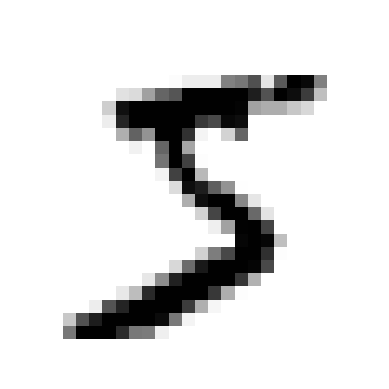

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

Parece un __9__, miremos la etiqueta asociada con este conjunto de datos:

In [7]:
y[80]

'9'

Ahora miremos las __etiquetas__:

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object)

Las dimensiones de la etiqueta muestran que tiene 70.000 filas y una columna:

In [9]:
y.shape

(70000,)

Miremos otros registros de la matriz de características de la base de datos: 

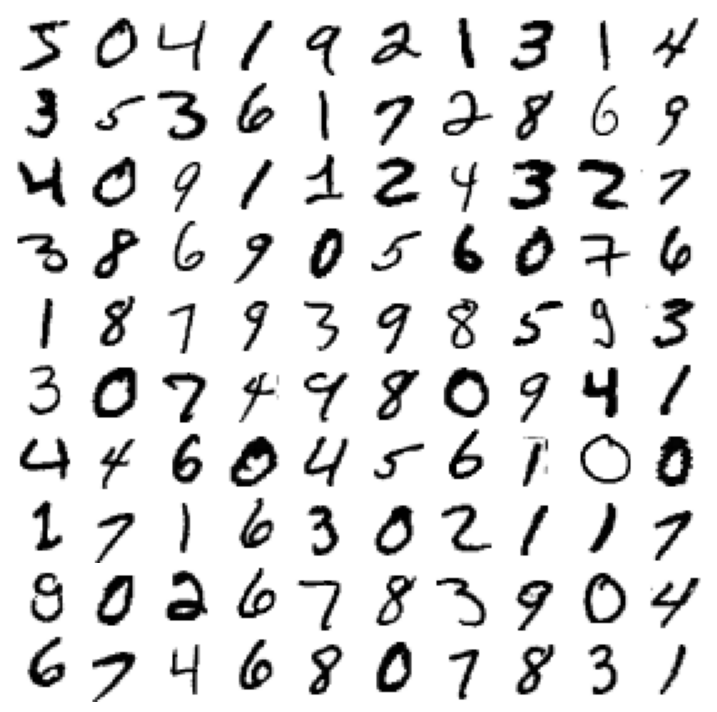

In [10]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Asumamos que los datos ya están limpios ...

<details>
<summary>¿Recuerdan que es lo que hacemos a continuación?</summary>

**Respuesta:**  
Crear nuestra base de entrenamiento y nuestra base de prueba.

</details>


Esta base además de estar limpia ya está barajada por lo que también nos ahorra este paso:

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

<details>
<summary>¿Cómo fue la partición?</summary>

**Respuesta:**  
Base de entrenamiento: 60 mil registros.
Base de prueba: 10 mil registros.

</details>


## Entrenemos un clasificador binario

**¿Que es un clasificador binario?**

Suponga que nos piden crear un detector de ochos (8), esto sería un clasificador binario, capaz de distinguir entre dos clases:

- Los números 8.
- Todos los números que no son 8.


**¿Recuerdan como está la variable _Y_ actual?** como una variable categórica que tiene los dígitos del 0 al 9. Necesitamos, entonces, crear una variable binaria que tome el valor de _1_ si Y es 8 y de _0_ si Y es diferente de 8.

In [12]:
y_train_8 = (y_train == '8')
y_test_8 = (y_test == '8')

Una vez creadas las variables etiquetas es hora de elegir un `clasificador`, en este caso usaremos el típico `SGDCClassifier` que corresponde a un clasificador de descenso estocástico. Es como una versión optimizada de una regresión logística o lineal, pensada para bases de datos muy grandes o con muchas variables.

**¿Cómo funciona el SGD?**

En lugar de mirar todos los datos al mismo tiempo (como hace una regresión clásica), el SGDClassifier aprende poco a poco, tomando pequeños grupos de observaciones y ajustando su modelo con cada una.

Es como si un encuestador fuera corrigiendo su predicción persona por persona, en lugar de esperar a tener toda la muestra.

**¿Recuerdan por qué usamos `random_state=42`?**

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_8)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


Ahora tenemos un modelo que ha sido entrenado para deteectar imágenes que contengan el número 8:

In [14]:
sgd_clf.predict([X[25000]])

array([False])

Elegimos un registro al azar y al parecer no corresponde a un número 8. __¿Cuál podría corresponder?__ Según la tabla de números de arriba.

## Medidas de desempeño

Evaluar un clasificador puede ser más engañoso que evaluar un modelo de regresión. Entonces nos quedaremos en este tema un rato.

### Medir la precisión (accuracy) usando validación cruzada:

¿Recuerdan la _validación cruzada_?

En este caso evaluamos nuestro modelo de clasificación SGD usando una __validación cruzada con K pliegues__ que divide la base entrenamiento en K pliegues (en este caso tres), entrena el modelo K veces (por cada pliegue) y lo evalúa con los dos restantes:

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.909  , 0.9286 , 0.88285])

In [16]:
?help.cross_val_score

Object `help.cross_val_score` not found.


Recordemos que __accuracy__ o __precisión__ es el porcentaje de todas las predicciones que son correctas. En este caso el modelo clasifica muy bien:

In [17]:
((0.909+0.9286+0.88285)/3)*100

90.68166666666667

__¿Pero es bueno nuestro clasificador?__ Miremos uno que asigne todas las imágenes en la categoría más frecuente: la de números que no son 8:

In [18]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_8)
print(any(dummy_clf.predict(X_train)))

False


In [19]:
cross_val_score(dummy_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.9025 , 0.9025 , 0.90245])

Miren este nivel de predicciones correctas: **¡90 %!**



<details>
<summary>¿Por qué creen que pasa esto?</summary>

**Respuesta:**  
Porqué solamente aproximadamente el 10 % de los registros corresponden al número 8.

</details>


Acá vemos por qué la __precisión (accuracy)__ no es la medida de desempeño más usada para los clasificadores, especialmente cuando se tienen baes de datos sesgadas. Una manera mucho más óptima es mirar la **`Matriz de confusión`**:

<img src="metricas_class.jpg">

- **TP (true positives):** casos positivos que el modelo predijo correctamente.
- **TN (true negatives):** casos negativos que el modelo predijo correctamente.
- **FP (false positives):** casos negativos que el modelo predijo err ́oneamente como positivos.
- **FN (false negatives):** casos positivos que el modelo predijo err ́oneamente como negativos.

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_8, y_train_pred)
cm

array([[50006,  4143],
       [ 1448,  4403]])

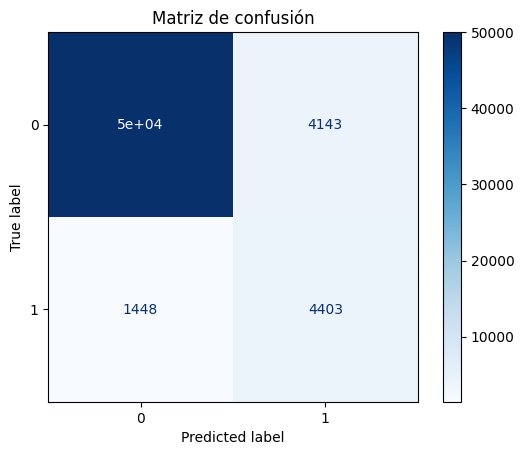

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_train_8, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión")
plt.show()

Vamos a ubicar esto en la matriz de confusión e __interpretemos__:

- ¿Cuántas imágenes-8 fueron clasificadas correctamente?
- ¿Cuántas imágenes-8 fueron clasificadas de forma incorrecta?
- ¿Cuántas imágenes-no-8 fueron clasificadas correctamente?
- ¿Cuántas imágenes-no-8 fueron clasificadas de forma incorrecta?

Una __matriz de confusión perfecta__ se vería así:

In [22]:
y_train_perfect_predictions = y_train_8
confusion_matrix(y_train_8, y_train_perfect_predictions)

array([[54149,     0],
       [    0,  5851]])

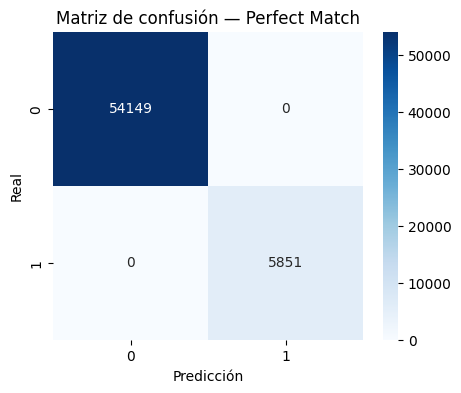

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_train_perfect_predictions = y_train_8
cm = confusion_matrix(y_train_8, y_train_perfect_predictions)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión — Perfect Match")
plt.show()

Miremos la información que podemos extraer de la matriz de confusión.



## Precision y Recall: precisión y sensibilidad

### Precision (precisión):

Mide qué proporción de las predicciones positivas fueron realmente correctas:

$$
\text{Precision} = \frac{\text{Verdaderos Positivos (TP)}}{\text{Verdaderos Positivos (TP)} + \text{Falsos Positivos (FP)}}
$$



In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_8, y_train_pred)

0.515211794991809

Esta medida puede ser engañada de una forma muy sencilla.

<details>
<summary>¿Se les ocurre cómo?</summary>

**Respuesta:**  
Clasificando como negativas todas excepto una observación, aquella de la que estemos seguro que es realmente positiva.

</details>

Un clasificador así no sería muy útil. Por lo tanto el indicador de precisión se suele acompañar de uno llamado __recall__, __sensibilidad__ o __ratio de verdaderos positivos__:

### Recall (sensibilidad):

Indica qué proporción de los casos positivos reales fueron correctamente identificados.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

In [24]:
recall_score(y_train_8, y_train_pred)

0.7525209365920356

Este clasificador ya no parece tan atractivo. Recordemos sus indicadores de desempeño:

- **Precisión:** 0.52 ... cuando afirma que una figura es un 8 sólo acierta un 52 % de las veces.
- **Sensibilidad:** 0.75 ... sólo detecta el 75 % de los 8.

Es necesaria entonces una métrica que combine la sensibilidad y la precisión, acá entra el __Puntaje F1__ que favorece clasificadores que tengan sensibilidad y precisión similar:

### F1-Score (puntaje F1):

Combina precisión y recall en una sola métrica equilibrada.

$$
F_1 = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
$$

In [25]:
from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_pred)

0.6116552059456831

Aunque este equilibrio no siempre es deseable. A veces queremos mayor precisión y a veces mayor sensibilidad.

__¿Qué preferiría en estos casos?__

- Un clasificador de vídeos seguros para niños y niñas.
  
- Clasificador de posibles ladrones en el metro mediante cámaras.

Cómo no se pueden tener las dos medidas optimizadas, se presenta un trade-off entre precisión y sensibilidad.

### Trade-off entre Precision/Recall

Hagamos un ejemplo gráfico en el tablero para que esto quede más claro

Miremos el valor que emplea el modelo para asignar a uno de los dos valores de la clasificación:

In [26]:
y_scores = sgd_clf.decision_function([X[17]])
y_scores

array([1089.15759949])

In [27]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [28]:
y_some_digit_pred

array([ True])

In [29]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3,
                             method="decision_function")

In [31]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

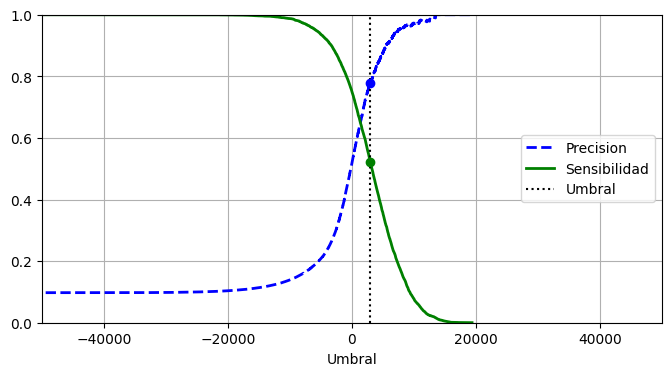

In [32]:
plt.figure(figsize=(8, 4))  
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Sensibilidad", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="Umbral")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Umbral")
plt.legend(loc="center right")

plt.show()

En el gráfico anterior podemos  ver como el umbral afecta la precisión y la sensibilidad del modelo:

- Eje X: umbral.
- Eje Y: las métricas precisión y recall.

**¿Qué pasa cuando el umbral es muy alto?**
**¿Qué pasa cuando el umbral es muy alto?**

Hay un punto en el que ambos se cruzan, podría ser el __equilibrio natural del clasificador__.

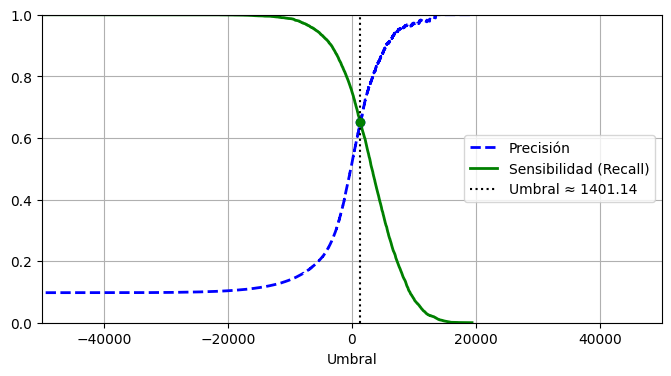

Umbral donde se cruzan Precision y Recall: 1401.1424255950992


In [33]:
import numpy as np
import matplotlib.pyplot as plt

idx_cross = np.argmin(np.abs(precisions[:-1] - recalls[:-1]))


threshold_cross = thresholds[idx_cross]


plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precisión", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Sensibilidad (Recall)", linewidth=2)
plt.vlines(threshold_cross, 0, 1.0, "k", "dotted", label=f"Umbral ≈ {threshold_cross:.2f}")
plt.plot(thresholds[idx_cross], precisions[idx_cross], "bo")
plt.plot(thresholds[idx_cross], recalls[idx_cross], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Umbral")
plt.legend(loc="center right")
plt.show()

print("Umbral donde se cruzan Precision y Recall:", threshold_cross)


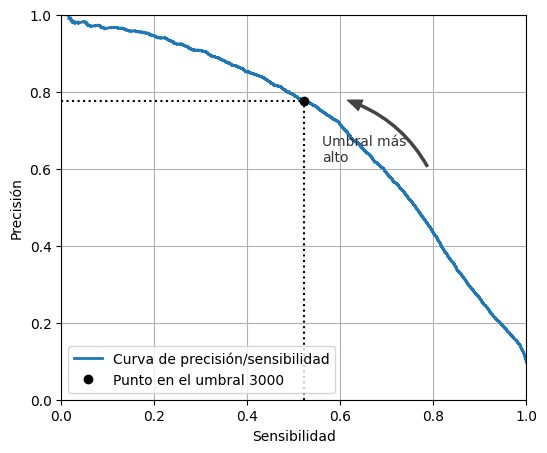

In [34]:
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))

plt.plot(recalls, precisions, linewidth=2, label="Curva de precisión/sensibilidad")


plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Punto en el umbral 3000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Umbral más \nalto", color="#333333")
plt.xlabel("Sensibilidad")
plt.ylabel("Precisión")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


plt.show()

Otra forma de seleccionar un buen trade-off entre sensibilidad y precisión es graficar ambos directamente como se muestra en la figura anterior, la cual se llama **Curva de precisión-sensibilidad**.

El punto negro muestra el umbral arbitrario que definimos, el cual es bastante exigente.

Supongamos que nuestro objeto de estudio requiere un **90 % de precisión**, podemos encontrar el umbral más bajo que nos garantice este porcentaje de precisión con el siguientee comando:

In [35]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(5558.688951079276)

In [36]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [37]:
precision_score(y_train_8, y_train_pred_90)

0.9003419638495359

In [38]:
recall_at_90_precision = recall_score(y_train_8, y_train_pred_90)
recall_at_90_precision

0.3149888907878995

Excelente, tenemos un clasificador que tiene un 90 % de precisión pero esto no es tan útil con una sensibilidad tan baja: 32 %, que para la mayoría de aplicaciones no tiene ninguna utilidad.

### La curva ROC

Viene del inglés **receiver operating characteristic** (ROC) es otra herramienta común usada con clasificadores binarios, es muy similar a la _curva de precisión-sensibilidad_.

Grafica la __sensibilidad__ o _tasa de verdaderos positivos_ contra la FPR o _proporción de instancias negativas que son clasificadas como positivas_ es decir: 1 - _tasa de falsos negativos_ (especificidad).

Entonces ROC grafica la sensibilidad contra **1 - especificidad**.

A continuación se presenta la función de Scikit-Learn para la curva ROC:

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

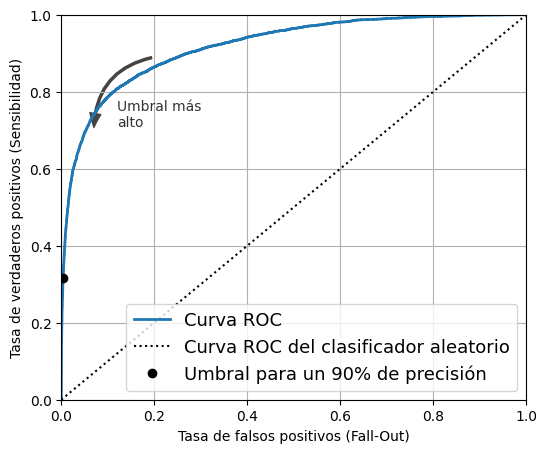

In [40]:

idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5)) 
plt.plot(fpr, tpr, linewidth=2, label="Curva ROC")
plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC del clasificador aleatorio")
plt.plot([fpr_90], [tpr_90], "ko", label="Umbral para un 90% de precisión")


plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Umbral más\nalto", color="#333333")
plt.xlabel('Tasa de falsos positivos (Fall-Out)')
plt.ylabel('Tasa de verdaderos positivos (Sensibilidad)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

- Cuanto **más cerca esté la curva del rincón superior izquierdo**, mejor: significa **alta sensibilidad** con **pocos falsos positivos**.
- La **línea diagonal (punteada)** representa un clasificador *aleatorio*, sin capacidad real de distinguir clases (como lanzar una moneda).
- El punto marcado indica el rendimiento del modelo con el **umbral que logra una precisión del 90 %.**

El **área bajo la curva (AUC)** mide el rendimiento global:

- **AUC = 1.0**, modelo perfecto.
- **AUC = 0.5**, modelo sin poder predictivo.

Miremos la función que calcula la AUC:

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_8, y_scores)

0.9192599874103056

Creemos ahora un `RandomForestClassifier` o clasificador de random forest y comparemos su curva de precisión-sensibilidad con la del `SGDClassifier`:

In [42]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [43]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_8, cv=3,
                                    method="predict_proba")

In [44]:
y_probas_forest[:10]

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.99, 0.01]])

El modelo de Random Forest asigna probabilidades de pertenecer a cada clase, pero son __probabilidades estimadas__ no probabilidades reales. Miremos que los que afirmó que pertenecían a clase positiva (eran 8) con un 50 a 60 % de probabilidad, en realidad tenían 94 % de imágenes positivas.

In [45]:
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_8[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

93.6%


Función para clasificar entre clases los valores obtenidos en el Random Foret (que maximice Sensibilidad):

In [46]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_8, y_scores_forest)

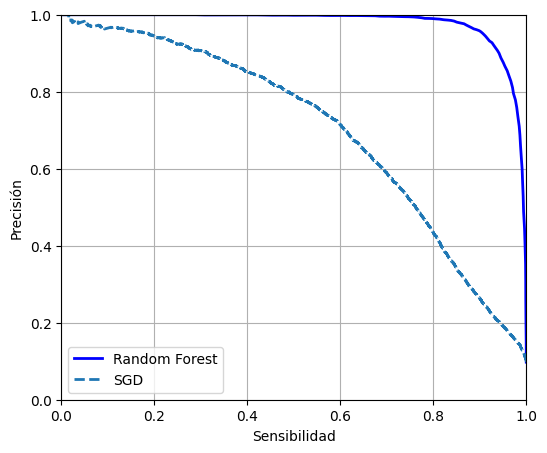

In [47]:
plt.figure(figsize=(6, 5))  
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")


plt.xlabel("Sensibilidad")
plt.ylabel("Precisión")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")

plt.show()

In [48]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
f1_score(y_train_8, y_train_pred_forest)

0.8925557847365461

In [49]:
roc_auc_score(y_train_8, y_scores_forest)

0.9965481456893603

Miremos ahora la __sensibilidad__ y la __precisión__ del Random Forest contra el SGD ¿Cómo les pareceen estos valores?

In [50]:
precision_score(y_train_8, y_train_pred_forest)

0.9885773624091381

In [51]:
precision_score(y_train_8, y_train_pred)

0.515211794991809

In [52]:
recall_score(y_train_8, y_train_pred_forest)

0.8135361476670655

In [53]:
recall_score(y_train_8, y_train_pred)

0.7525209365920356